# 특이값 분해(SVD, Singular Value Decomposition)


In [3]:
import numpy as np

A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]])

In [10]:
U, s, VT = np.linalg.svd(A)

print(U.shape)
print(s)
print(VT.shape)

(4, 4)
[3.         2.23606798 2.         0.        ]
(5, 5)


In [6]:
a = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0 ,0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

U, s, VT = np.linalg.svd(a)

print(U.shape)
print(s.shape)
print(VT.shape)

(7, 7)
(5,)
(5, 5)


# 이미지에 적용한 특이값 분해

In [13]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


size(dimension):  (100, 120)


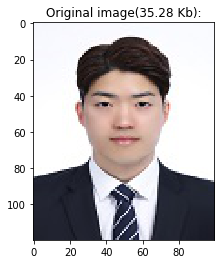

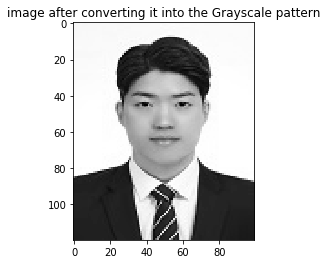

after compression: 


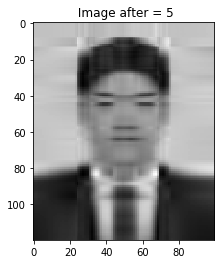

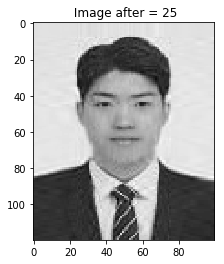

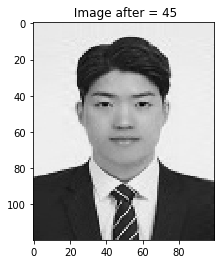

In [17]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = '0806_특이값용사진.jpg'

img =Image.open(path)

s = float(os.path.getsize(path))/1000
print('size(dimension): ', img.size)
plt.title('Original image(%0.2f Kb):' %s)
plt.imshow(img)


imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)

#이미지 크기(가로, 세로)로 reshape

imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title('image after converting it into the Grayscale pattern')
plt.show()

print('after compression: ')
U, S, Vt = np.linalg.svd(imgmat)

# 5, 25, 45 개의 특이값을 적용하여 이미지 압축 
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap = 'gray')
    title = ' Image after = %s' %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))